[A crash course on numpy image](https://scikit-image.org/docs/dev/user_guide/numpy_images.html)

In [2]:
# Import some packages from matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Uncomment the next line for use in a Jupyter notebook
#%matplotlib inline

# Define the filename, read and plot the image
filename = 'sample.jpg'
image = mpimg.imread(filename)
plt.imshow(image)
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
# Import the "numpy" package for working with arrays
import numpy as np
print(image.dtype, image.shape, np.min(image), np.max(image))
# uint8 (160, 320, 3) 0 255

uint8 (160, 320, 3) 0 255


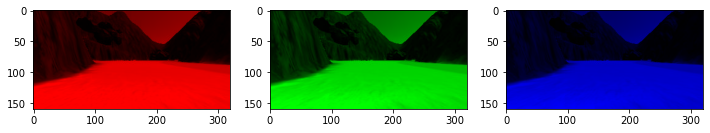

In [4]:
# Note: we use the np.copy() function rather than just saying red_channel = image
# because in Python, such a statement would set those two arrays equal to each other
# forever, meaning any changes made to one would also be made to the other!
red_channel = np.copy(image)
# Note: here instead of extracting individual channels from the image
# I'll keep all 3 color channels in each case but set the ones I'm not interested 
# in to zero.  
red_channel[:,:,[1, 2]] = 0 # Zero out the green and blue channels
green_channel = np.copy(image)
green_channel[:,:,[0, 2]] = 0 # Zero out the red and blue channels
blue_channel = np.copy(image)
blue_channel[:,:,[0, 1]] = 0 # Zero out the red and green channels
fig = plt.figure(figsize=(12,3)) # Create a figure for plotting
plt.subplot(131) # Initialize subplot number 1 in a figure that is 3 columns 1 row
plt.imshow(red_channel) # Plot the red channel
plt.subplot(132) # Initialize subplot number 2 in a figure that is 3 columns 1 row
plt.imshow(green_channel)  # Plot the green channel
plt.subplot(133) # Initialize subplot number 3 in a figure that is 3 columns 1 row
plt.imshow(blue_channel)  # Plot the blue channel
plt.show() 

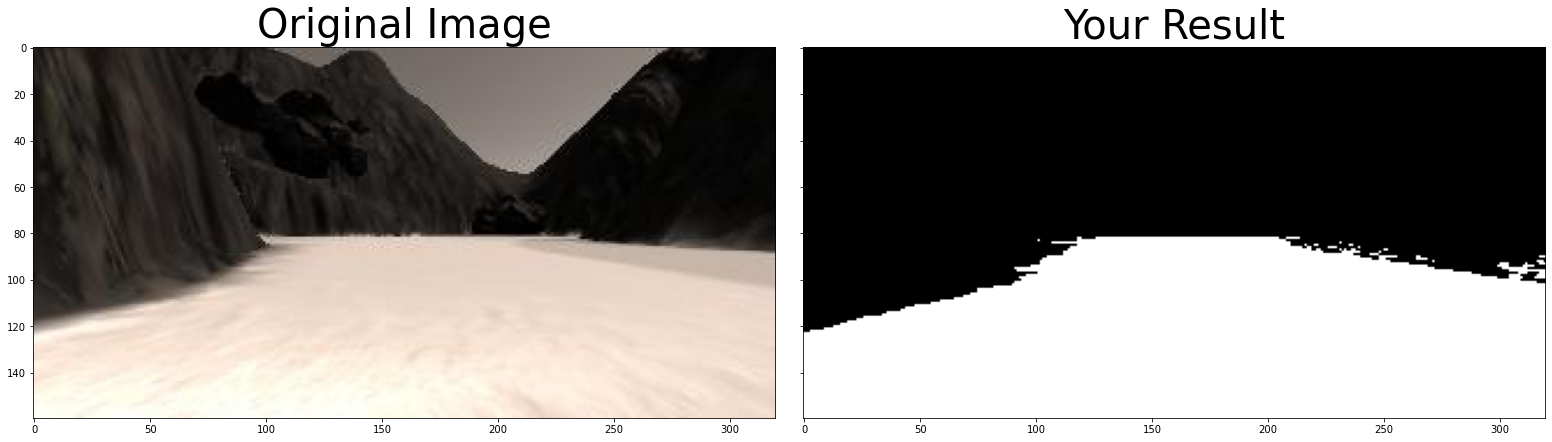

In [19]:
# Define a function to perform a color threshold
def color_thresh(img, rgb_thresh=(0, 0, 0)):
    ####### TODO 
    # Create an empty array the same size in x and y as the image 
        # but just a single channel
    # Apply the thresholds for RGB and 
        # assign 1's where threshold was exceeded
#     binary_image = np.copy(img)
#     binary_image[binary_image[::0]<200 and binary_image[::1]<100 and binary_image[::2]<100]=0
    binary_image=np.zeros((160,320),dtype=int)
    for i in range(160):
        for j in range(320):
            if(img[i,j,0]>rgb_thresh[0] and img[i,j,1]>rgb_thresh[1] and img[i,j,2]>rgb_thresh[2]):
                binary_image[i][j]=1
    #print(binary_image)
    return binary_image
res_img=color_thresh(image,[200,100,100])
# plt.imshow(res_img,cmap="gray")
# plt.show()
# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 7), sharey=True)
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(res_img, cmap='gray')
ax2.set_title('Your Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Color threshold.py Question


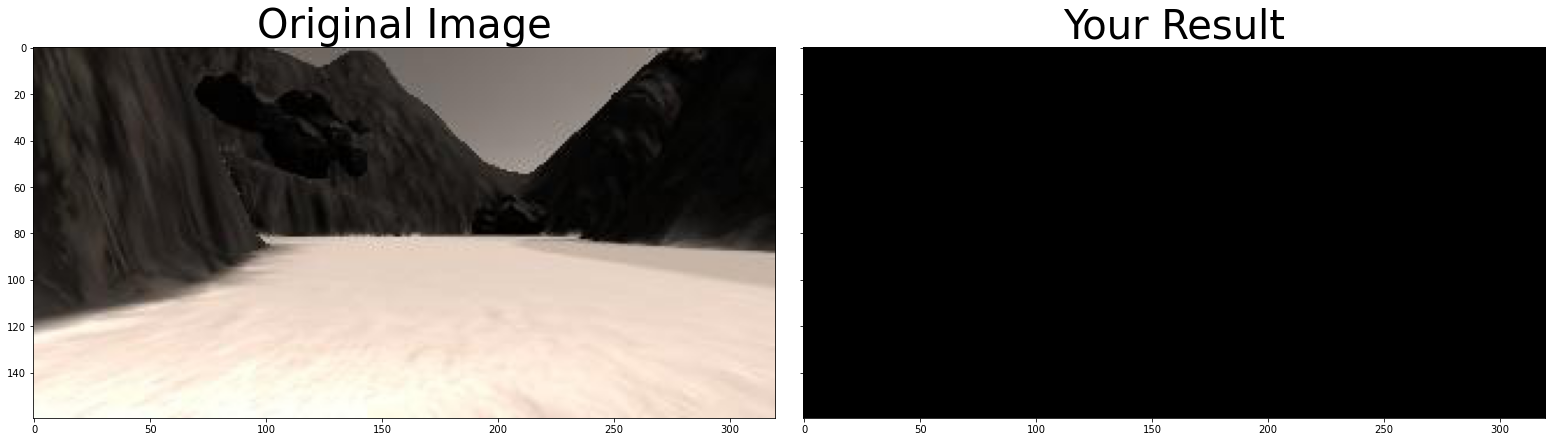

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
# There are six more images available for reading
# called sample1-6.jpg, feel free to experiment with the others!
image_name = 'sample.jpg'
image = mpimg.imread(image_name)

# Define a function to perform a color threshold
def color_thresh(img, rgb_thresh=(0, 0, 0)):
    ###### TODO:
    # Create an empty array the same size in x and y as the image 
    # but just a single channel
    color_select = np.zeros_like(img[:,:,0])
    # Apply the thresholds for RGB and assign 1's 
    # where threshold was exceeded
    # Return the single-channel binary image
    return color_select
    
# Define color selection criteria
###### TODO: MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 0
green_threshold = 0
blue_threshold = 0
######
rgb_threshold = (red_threshold, green_threshold, blue_threshold)

# pixels below the thresholds
colorsel = color_thresh(image, rgb_thresh=rgb_threshold)

# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 7), sharey=True)
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(colorsel, cmap='gray')
ax2.set_title('Your Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
#plt.show() # Uncomment if running on your local machine

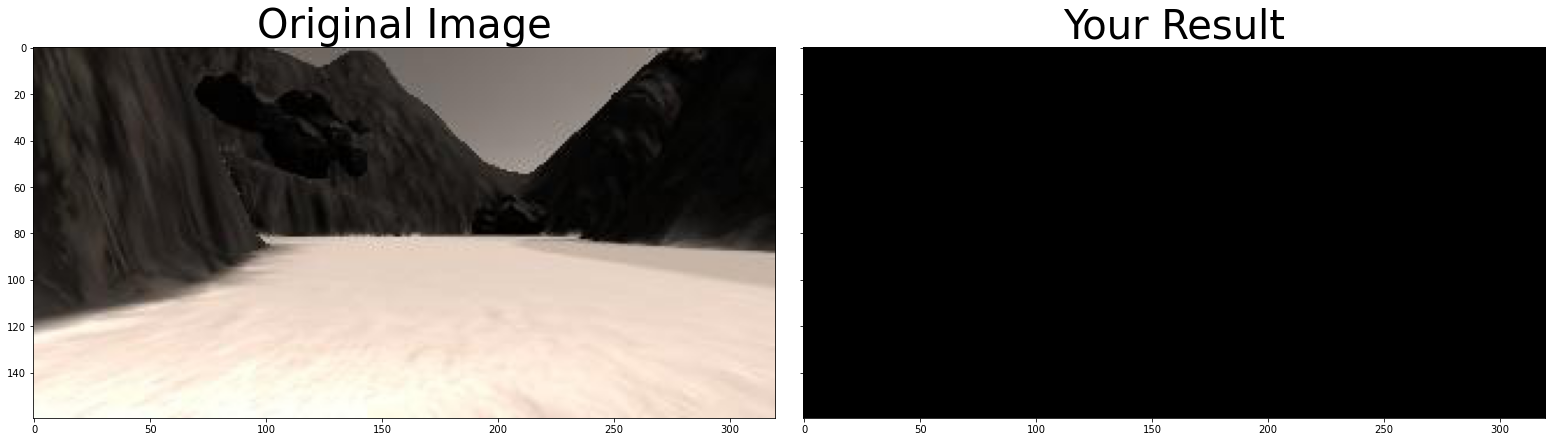

In [7]:
# Trial
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
# There are six more images available for reading
# called sample1-6.jpg, feel free to experiment with the others!
image_name = 'sample.jpg'
image = mpimg.imread(image_name)

# Define a function to perform a color threshold
def color_thresh(img, rgb_thresh=(0, 0, 0)):
    ###### TODO:
    # Create an empty array the same size in x and y as the image 
    # but just a single channel
    color_select = np.zeros_like(img[:,:,0])
    # Apply the thresholds for RGB and assign 1's 
    # where threshold was exceeded
    # Return the single-channel binary image
    return color_select
    
# Define color selection criteria
###### TODO: MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 0
green_threshold = 0
blue_threshold = 0
######
rgb_threshold = (red_threshold, green_threshold, blue_threshold)

# pixels below the thresholds
colorsel = color_thresh(image, rgb_thresh=rgb_threshold)

# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 7), sharey=True)
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(colorsel, cmap='gray')
ax2.set_title('Your Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
#plt.show() # Uncomment if running on your local machine

## Solution


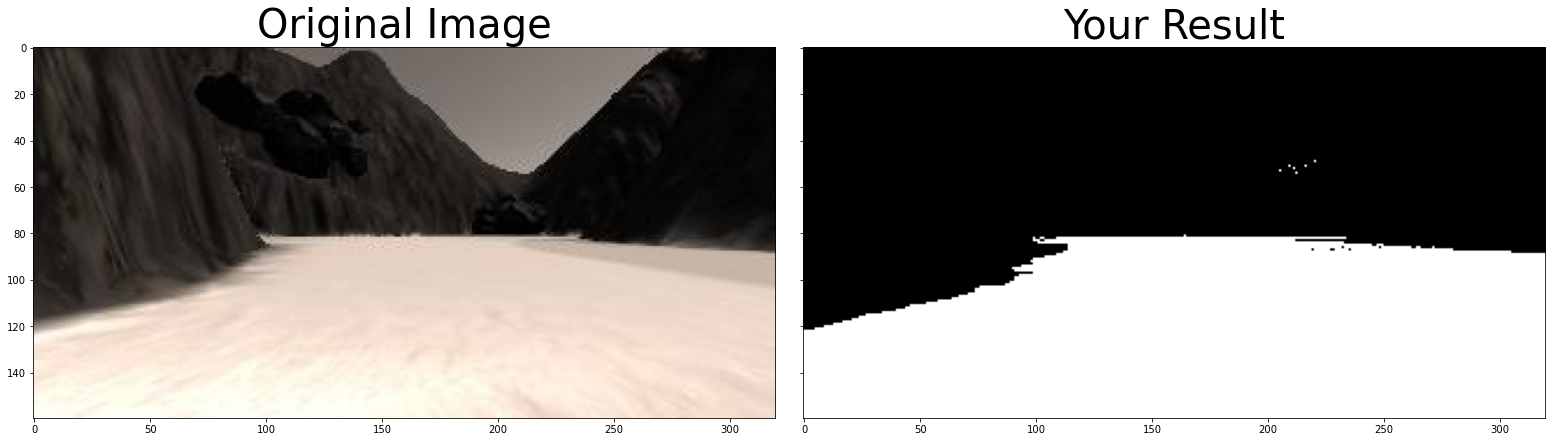

In [17]:
def color_thresh(img, rgb_thresh=(0, 0, 0)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select
    
# Define color selection criteria
###### TODO: MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 160
green_threshold = 160
blue_threshold = 160
######
final =color_thresh(image,(red_threshold,green_threshold,blue_threshold))
# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 7), sharey=True)
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(final, cmap='gray')
ax2.set_title('Your Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# 07. Perspective Transform
To get the coordinates of the grid

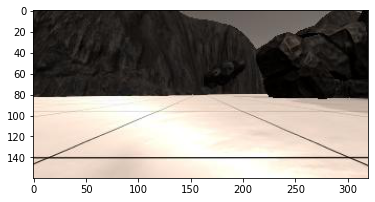

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Uncomment the next line for use in a Jupyter notebook
# This enables the interactive matplotlib window
#%matplotlib notebook
image = mpimg.imread('example_grid1.jpg')
plt.imshow(image)
# plt.show() 

In [3]:
y1 = 140
y2 = 96
y3 = y2
y4 = y1
x1 = 12
x2 = 117
x3 = 198
x4 = 302

# Warping

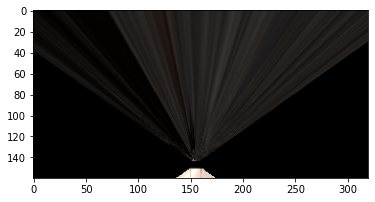

In [5]:
import cv2
import numpy as np

def perspect_transform(img, src, dst):

    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    # Return the result
    return warped

# Define source and destination points
source = np.float32([[ x1, y1], [ x2,y2 ], [x3, y3], [x4 ,y4 ]])
destination = np.float32([[ 150,150 ], [ 150,160 ], [160 , 160], [160 ,150 ]])      

warped = perspect_transform(image, source, destination)
plt.imshow(warped)
plt.show() 

### Warping Quiz

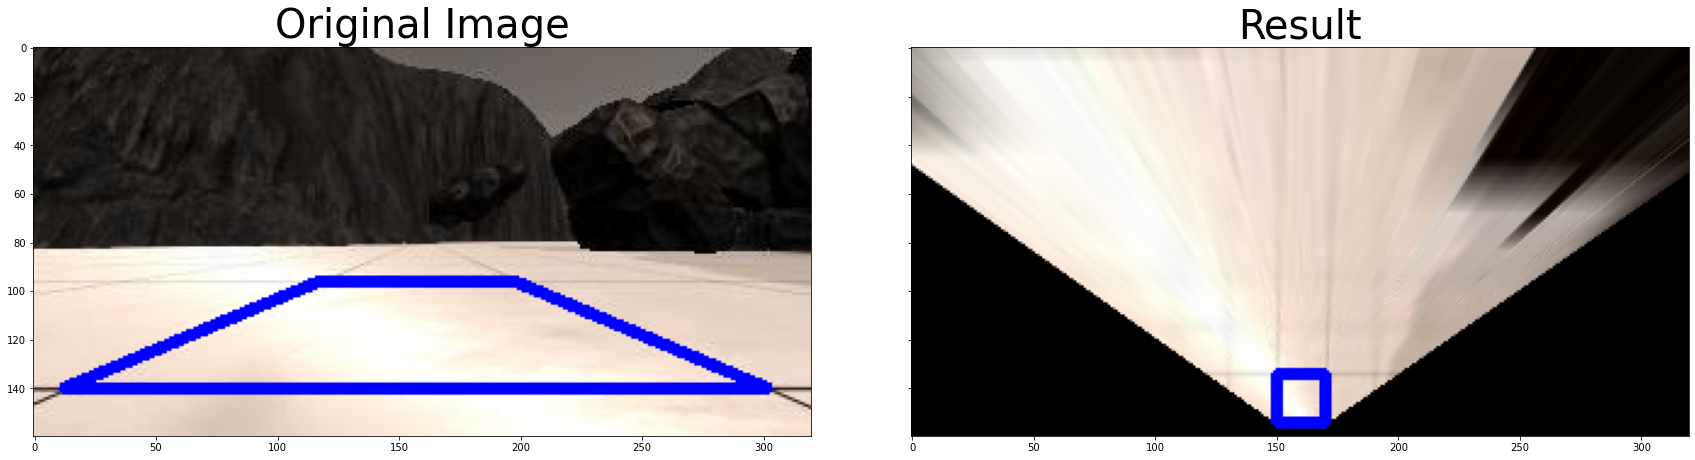

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

image = mpimg.imread('example_grid1.jpg')

def perspect_transform(img, src, dst):

    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    # Return the result
    return warped

# TODO:
# Define a box in source (original) and 
# destination (desired) coordinates
# Right now source and destination are just 
# set to equal the four corners
# of the image so no transform is taking place
# Try experimenting with different values!
# source = np.float32([[0, 0], 
#                  [0, image.shape[0]], 
#                  [image.shape[1], image.shape[0]], 
#                  [image.shape[1], 0]])
# destination = np.float32([[0, 0], 
#                  [0, image.shape[0]], 
#                  [image.shape[1], image.shape[0]], 
#                  [image.shape[1], 0]])

source = np.float32([[x1, y1], 
                 [x2, y2], 
                 [x3, y3], 
                 [x4, y4]])
dst_size = 10
bottom_offset = 6
destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset], 
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset]
                  ])

warped = perspect_transform(image, source, destination)
# Draw Source and destination points on images (in blue) before plotting
cv2.polylines(image, np.int32([source]), True, (0, 0, 255), 3)
cv2.polylines(warped, np.int32([destination]), True, (0, 0, 255), 3)
# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6), sharey=True)
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(warped, cmap='gray')
ax2.set_title('Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
#plt.show() # Uncomment if running on your local machine